# EDA, FE and Logistic Regression (Classification) Models (Diabetes Dataset)
## Aryan Shriva

**Linkedin:** https://www.linkedin.com/in/aryan-shriva-0811/

**GitHub** https://github.com/AryanShriva/Machine-Learning


### 1. EDA and FE
1. Data Profiling
2. Stastical analysis
3. Graphical Analysis
4. Data Cleaning
5. Data Scaling
6. Outlier Trimming

### 2. Logistic Regression (Classification) Models
1. Logistic Regression
2. Performance metrics for above models

**Dataset:** https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv

### <span style='color:red '>1.0 Importing Dataset </span>

In [2]:
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score

### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

In [3]:
dataset=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

In [4]:
### exporting file to csv for future use
dataset.to_csv("diabetes.csv")

### <span style='color:red '>1.1 Stastical Analysis </span>

In [5]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
dataset.shape

(768, 9)

### <span style='color:red '>1.2 Checking Missing values </span>

In [10]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
for feature in dataset.columns:
    print("{} has {} no of unique categories".format(feature, dataset[feature].nunique()))

Pregnancies has 17 no of unique categories
Glucose has 136 no of unique categories
BloodPressure has 47 no of unique categories
SkinThickness has 51 no of unique categories
Insulin has 186 no of unique categories
BMI has 248 no of unique categories
DiabetesPedigreeFunction has 517 no of unique categories
Age has 52 no of unique categories
Outcome has 2 no of unique categories


### <span style='color:red '>2.0 Graphical Analysis </span>

### <span style='color:red '>2.1 Checking Distribution of features </span>

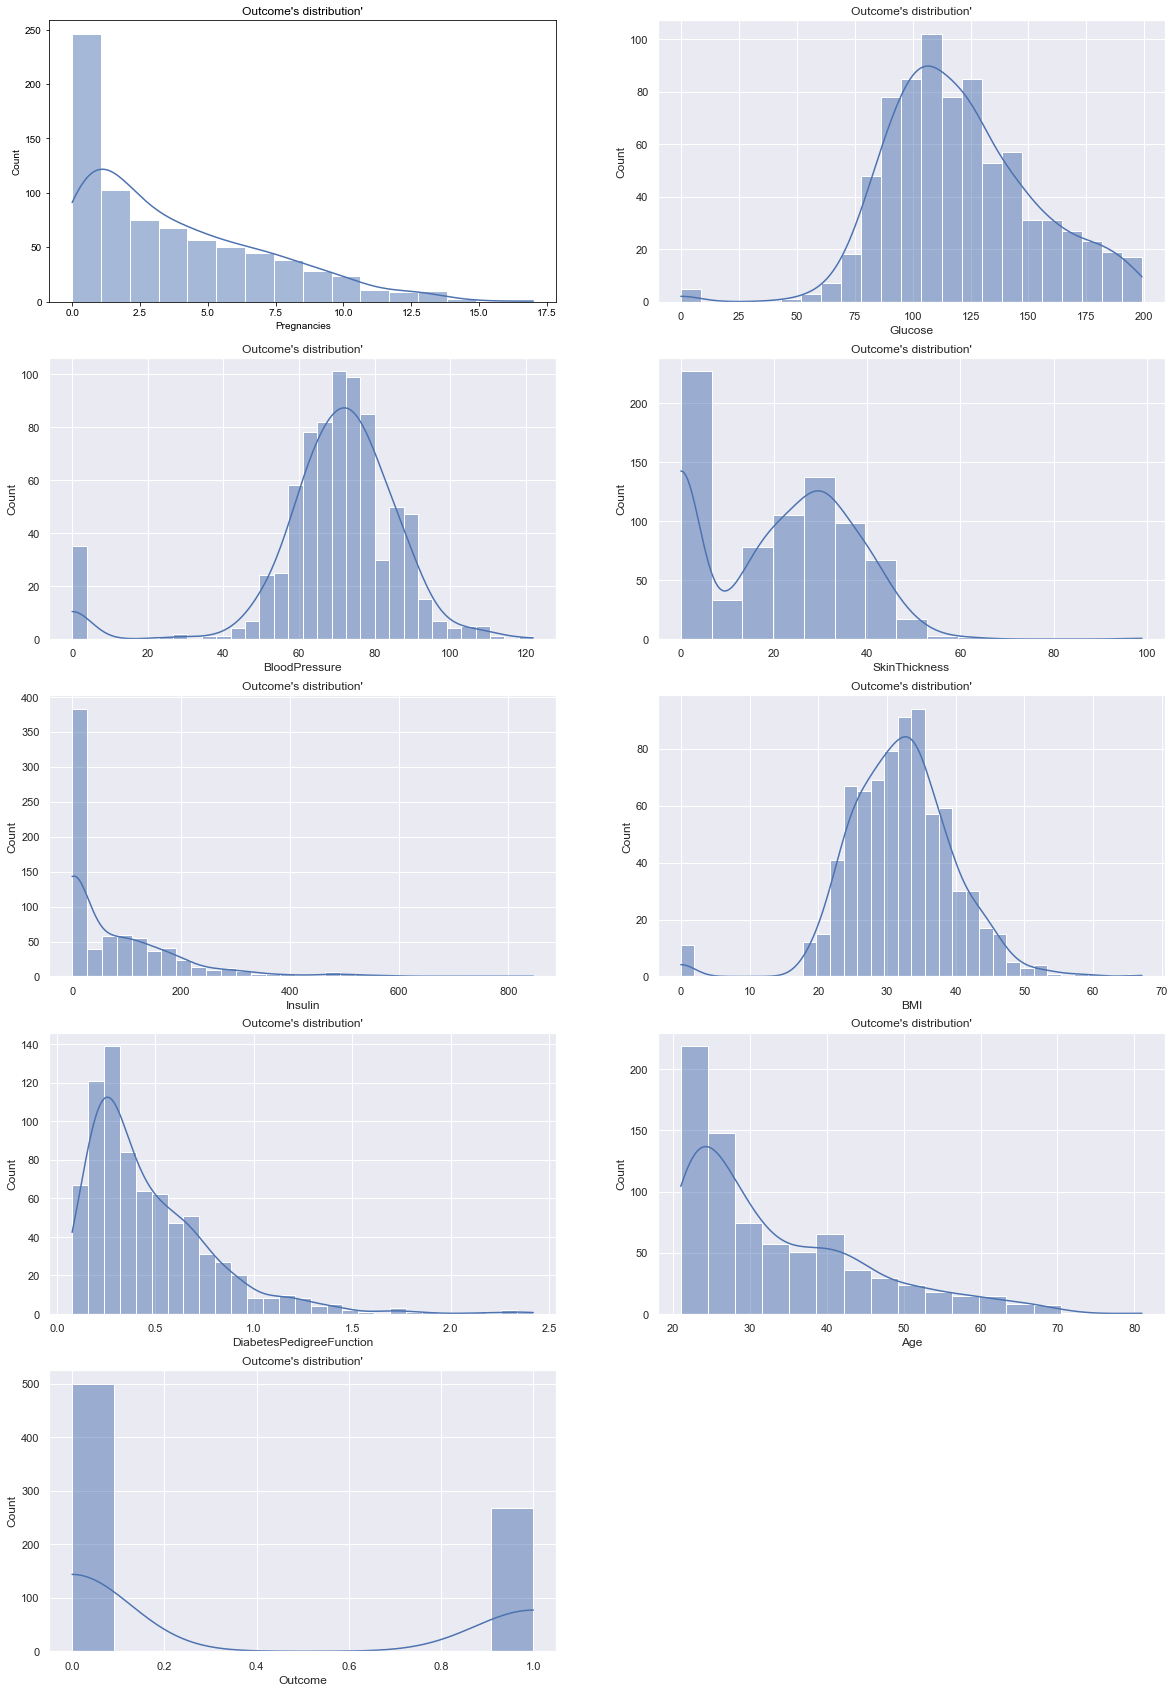

In [12]:
plt.figure(figsize=(20,30))
for i in enumerate(dataset.columns):
    plt.subplot(5, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,5)})
    sns.histplot(data=dataset, x=i[1], kde=True)
    plt.title("{}'s distribution'".format(feature))

### <span style='color:blue '>Observations</span>
1. Pregnancies has right skewed distribution, this indicates this feature has outliers towards right side of distribution.
2. Glucose has outliers towards left side of distribution.
3. BloodPressure has outliers towards left side of distribution.
4. Insulin has right skewed distribution, this indicates this feature has outliers towards right side of distribution.
5. BMI has outliers towards left side of distribution.
6. DiabetesPedigreeFunction has outliers towards left side of distribution.
7. Age has outliers towards left side of distribution.

<span style='color:blue '>8. Features like Glucose, BloodPressure, SkinThickness, Insulin, BMI have lot of zero values so replace these values with its mean. </span>


### <span style='color:red'>2.2 Replacing zero values with mean and rechecking Distribution of features </span>

**Note:** In place of mean we can also use median, mode or any random value.

In [13]:
### creating copy of dataset for further analysis so that we can also perform data cleaning on copied dataset.

data=dataset.copy()
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
### Replacing zero values in feature with mean values of that feature

for feature in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[feature]=data[feature].replace(0,data[feature].mean())

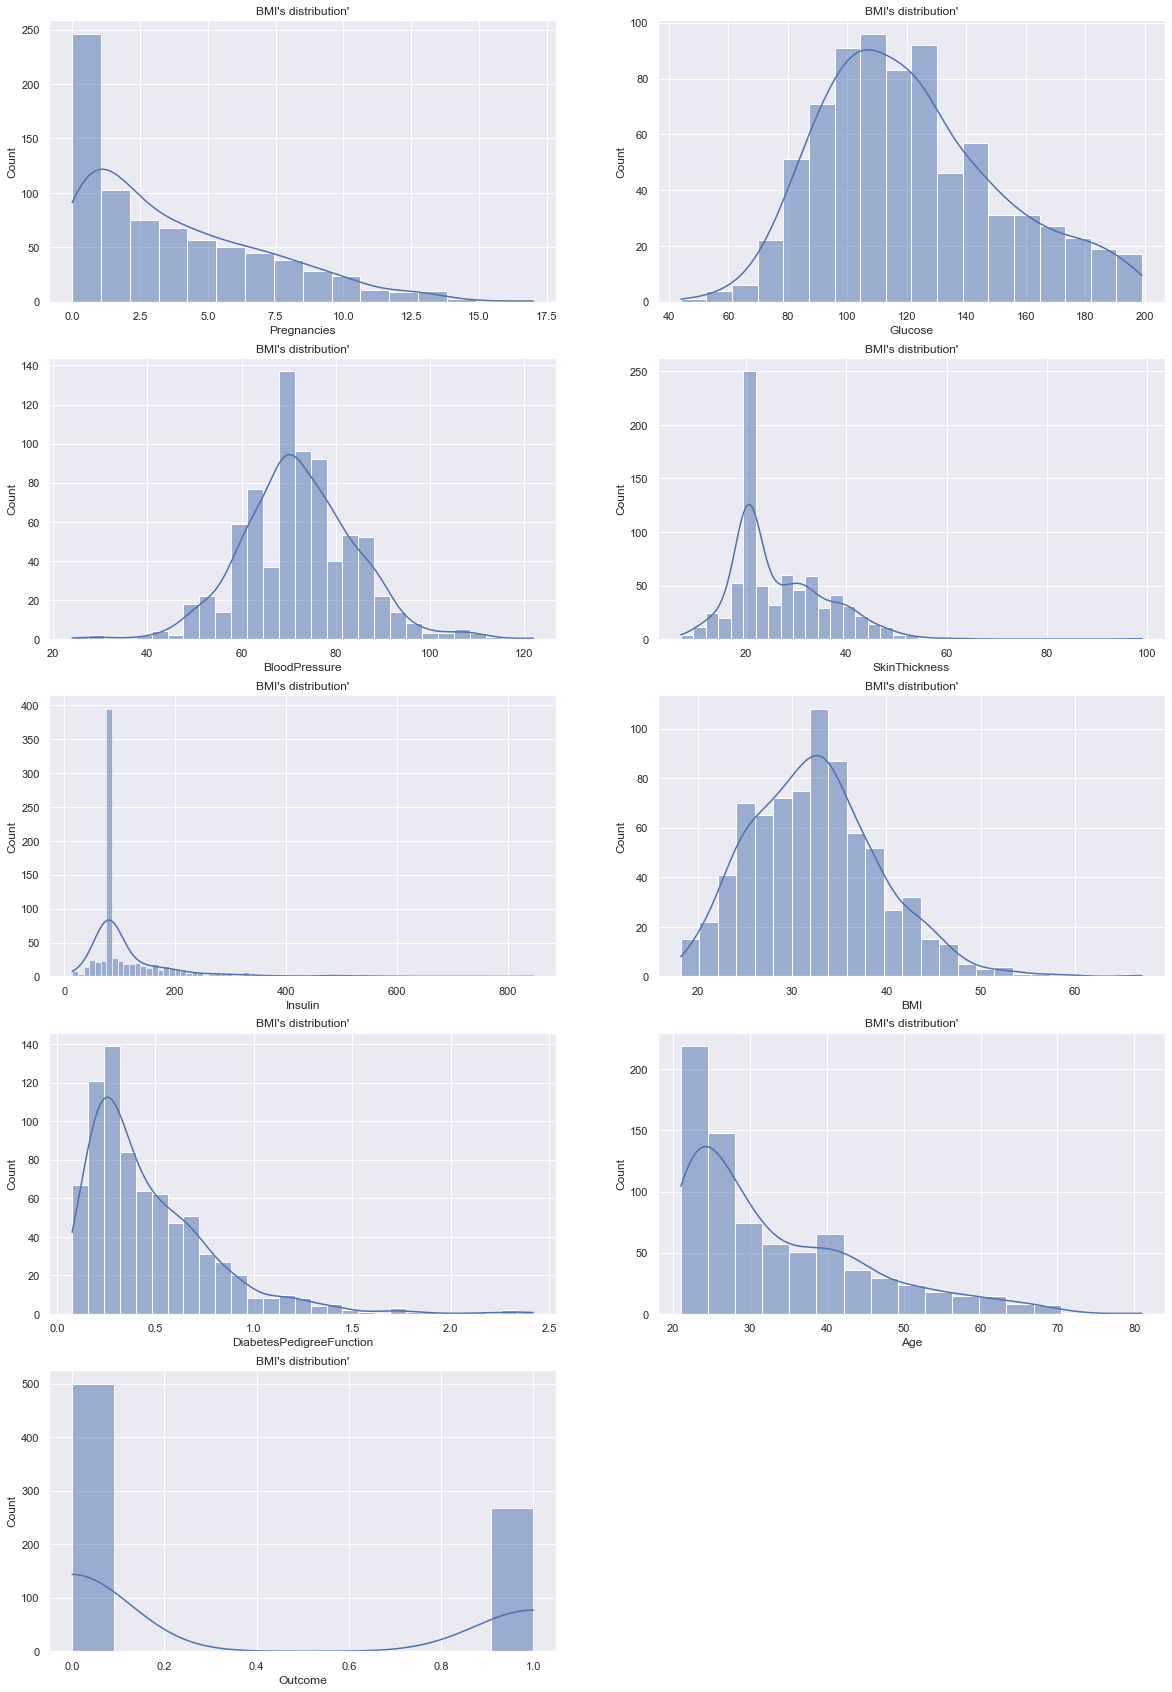

In [15]:
plt.figure(figsize=(20,30))
for i in enumerate(data.columns):
    plt.subplot(5, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,5)})
    sns.histplot(data=data, x=i[1], kde=True)
    plt.title("{}'s distribution'".format(feature))

### <span style='color:blue '>Observations </span>
1. After replacing zero values with means of these features Glucose, BloodPressure, SkinThickness, Insulin, BMI the distribution skewness managed a little bit.

### <span style='color:red '>2.3 Checking Outliers in independent features</span>

In [16]:
### Getting independent features
independent_features=[feature for feature in data.columns if feature not in ['Outcome']]
print(independent_features)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


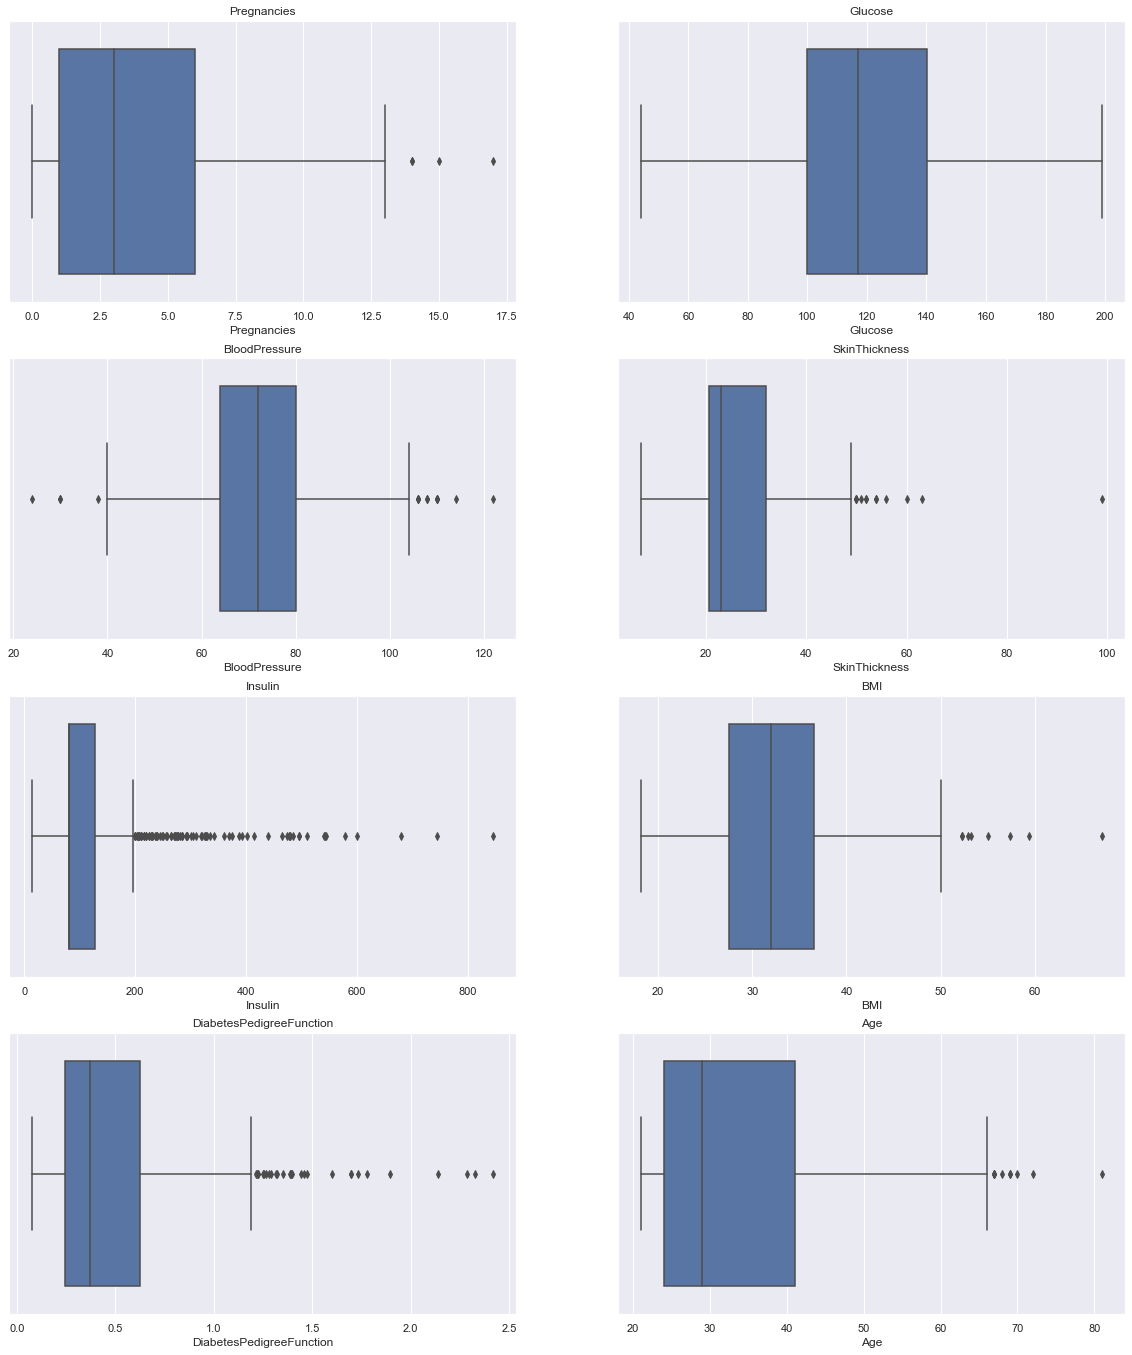

In [17]:
plt.figure(figsize=(20,30))
for i in enumerate(independent_features):
    plt.subplot(5, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,5)})
    sns.boxplot(data=data, x=i[1])
    plt.title("{}".format(i[1]))

### <span style='color:blue '>Observations </span>
**Note:** Some outliers are already handled when we replaced the zreo values with mean.

1. Glucose has zero outliers.
2. Pregnancies has some outliers on upper boundary side.
3. BloodPressure has outliers on both sides of boundary.
4. SkinThickness, BMI and Age have outliers on upper boundary side.
5. Insulin and DiabetesPedigreeFunction has large no of outliers on upper boundary side.

### <span style='color:red '>2.4 Trimming outliers </span>

In [18]:
def outlier_trimmer_upper(data_set, feature, trimming_value):
    """This function takes dataset, feature to be trimmed and the value after which we have to trim the data 
    and returns the dataset after trimming outliers in input feature.
    """
    threshold=data_set[feature].quantile(trimming_value/100)
    data_set=data_set[data_set[feature]<threshold]
    return data_set

def outlier_trimmer_lower(data_set, feature, trimming_value):
    """This function takes dataset, feature to be trimmed and the value after which we have to trim the data 
    and returns the dataset after trimming outliers in input feature.
    """
    threshold=data_set[feature].quantile(trimming_value/100)
    data_set=data_set[data_set[feature]>threshold]
    return data_set

In [19]:
### shape of data before trimming
data.shape

(768, 9)

In [20]:
### removing 1 percent outliers in BloodPressure, SkinThickness, BMI and Age as these feature has less no of outliers

for feature in ['BloodPressure', 'SkinThickness', 'BMI', 'Age']:
    data=outlier_trimmer_upper(data, feature, 99)

In [21]:
### shape of data after trimming
data.shape

(733, 9)

In [22]:
### removing 2 percent outliers in Insulin and DiabetesPedigreeFunction as they have large no of outliers

for feature in ['Insulin', 'DiabetesPedigreeFunction']:
    data=outlier_trimmer_upper(data, feature, 98)

In [23]:
data.shape

(703, 9)

In [24]:
### removing 0.5 percent outliers in BMI, Glucose, BloodPressure on lower side

for feature in ['Glucose', 'BloodPressure', 'BMI' ]:
    data=outlier_trimmer_lower(data, feature, 0.5)

In [25]:
data.shape

(688, 9)

### <span style='color:red '>2.5 Re-checking outliers after trimming outliers in independent features</span>

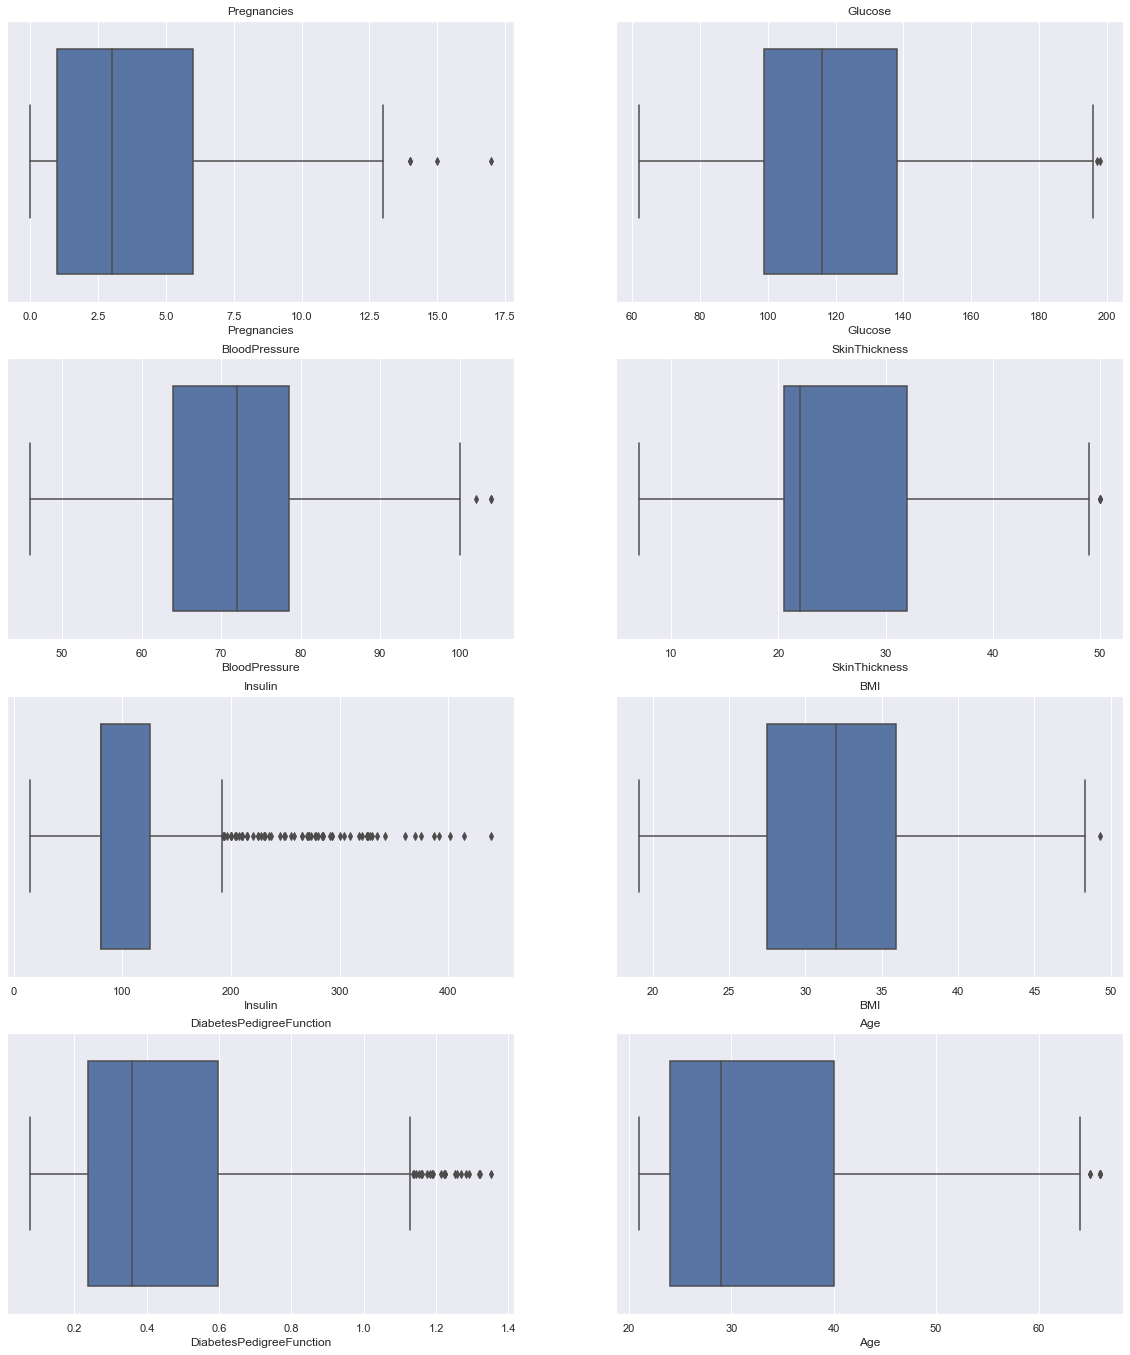

In [26]:
plt.figure(figsize=(20,30))
for i in enumerate(independent_features):
    plt.subplot(5, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,5)})
    sns.boxplot(data=data, x=i[1])
    plt.title("{}".format(i[1]))

### <span style='color:blue '>Observations </span>
**After Trimming Outliers**
1. BloodPressure has very few outliers on left sides of boundary now.
2. SkinThickness has no outliers now.
4. BMI and Age have very few outliers on upper boundary side now.
5. No of outliers is reduced for Insulin and DiabetesPedigreeFunction.
6. Now no feature has outliers on lower side.

### <span style='color:red '>2.6 Rechecking distribution of independent feature after trimming outlies</span>

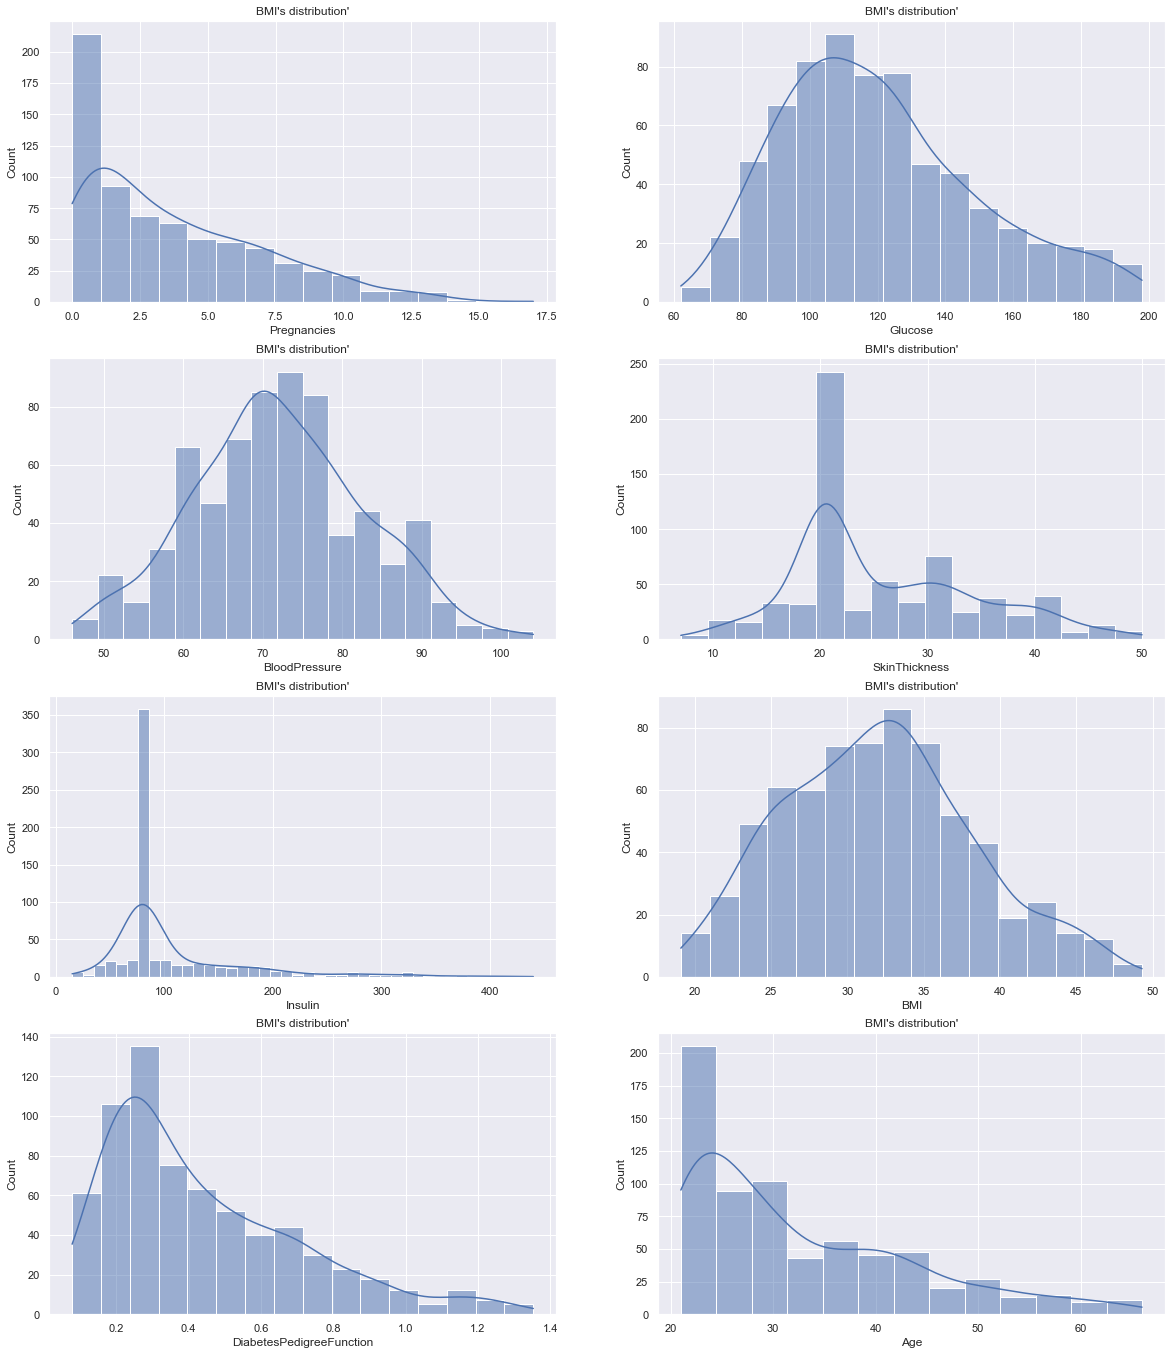

In [27]:
plt.figure(figsize=(20,30))
for i in enumerate(independent_features):
    plt.subplot(5, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,5)})
    sns.histplot(data=data, x=i[1], kde=True)
    plt.title("{}'s distribution'".format(feature))

### <span style='color:red '>2.7 Checking imbalance of data before and after trimming outliers</span>

### <span style='color:red '>2.7.1 Before trimming outliers</span>

<AxesSubplot:xlabel='Outcome', ylabel='count'>

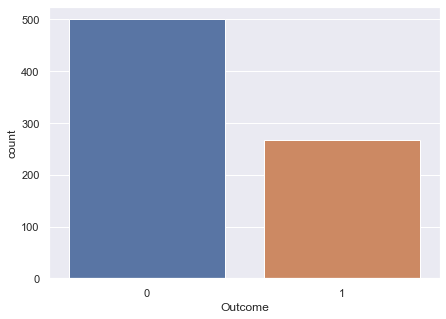

In [28]:
sns.countplot(data=dataset, x='Outcome')

### <span style='color:red '>2.7.2 After trimming outliers</span>

<AxesSubplot:xlabel='Outcome', ylabel='count'>

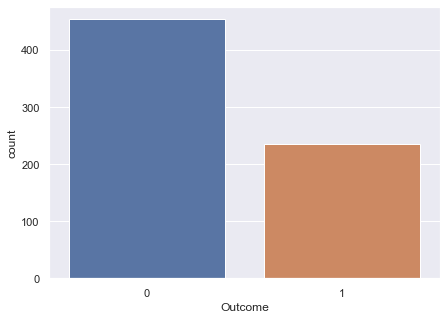

In [29]:
sns.countplot(data=data, x='Outcome')

### <span style='color:blue '>Observations </span>
1. We have imbalance in our dataset, lets not handle this imbalance and check accuracy, precision and recall
2. Then handle this imbalance and check accuracy, precision and recall

### <span style='color:red '>2.8 Relationship between independent features and dependent feature</span>

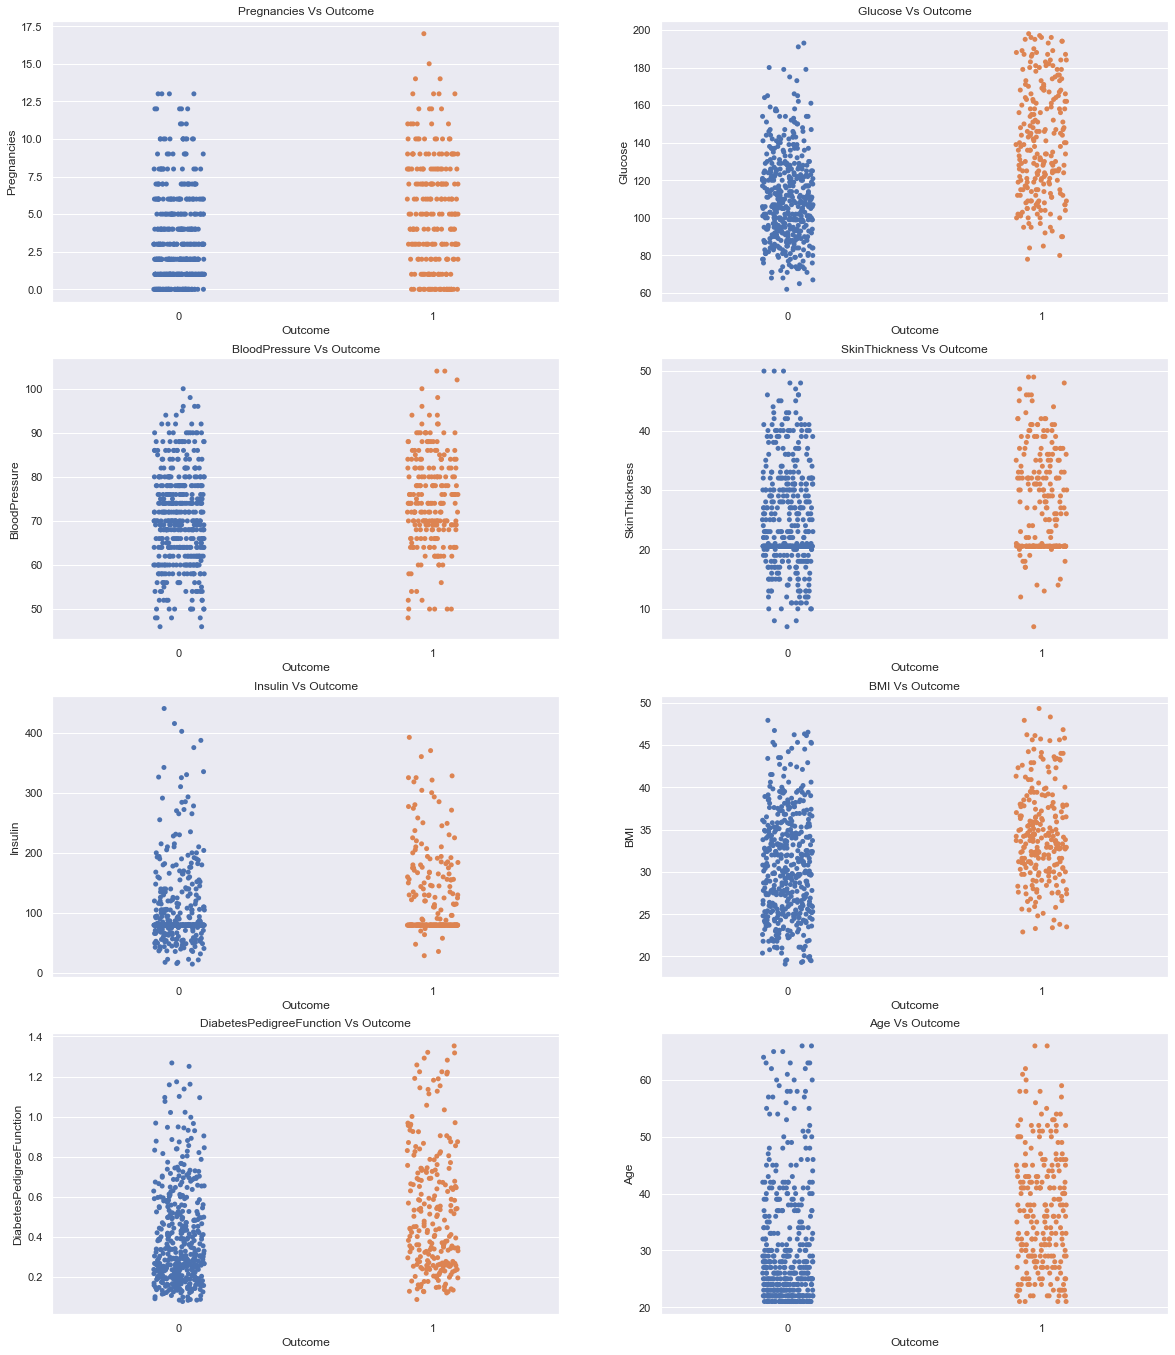

In [30]:
plt.figure(figsize=(20,30))
for i in enumerate(independent_features):
    plt.subplot(5, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,5)})
    sns.stripplot(data=data, y=i[1], x='Outcome')
    plt.title("{} Vs Outcome".format(i[1]))

### <span style='color:red '>2.9 Checking the variation of slope between independent features and dependent feature</span>

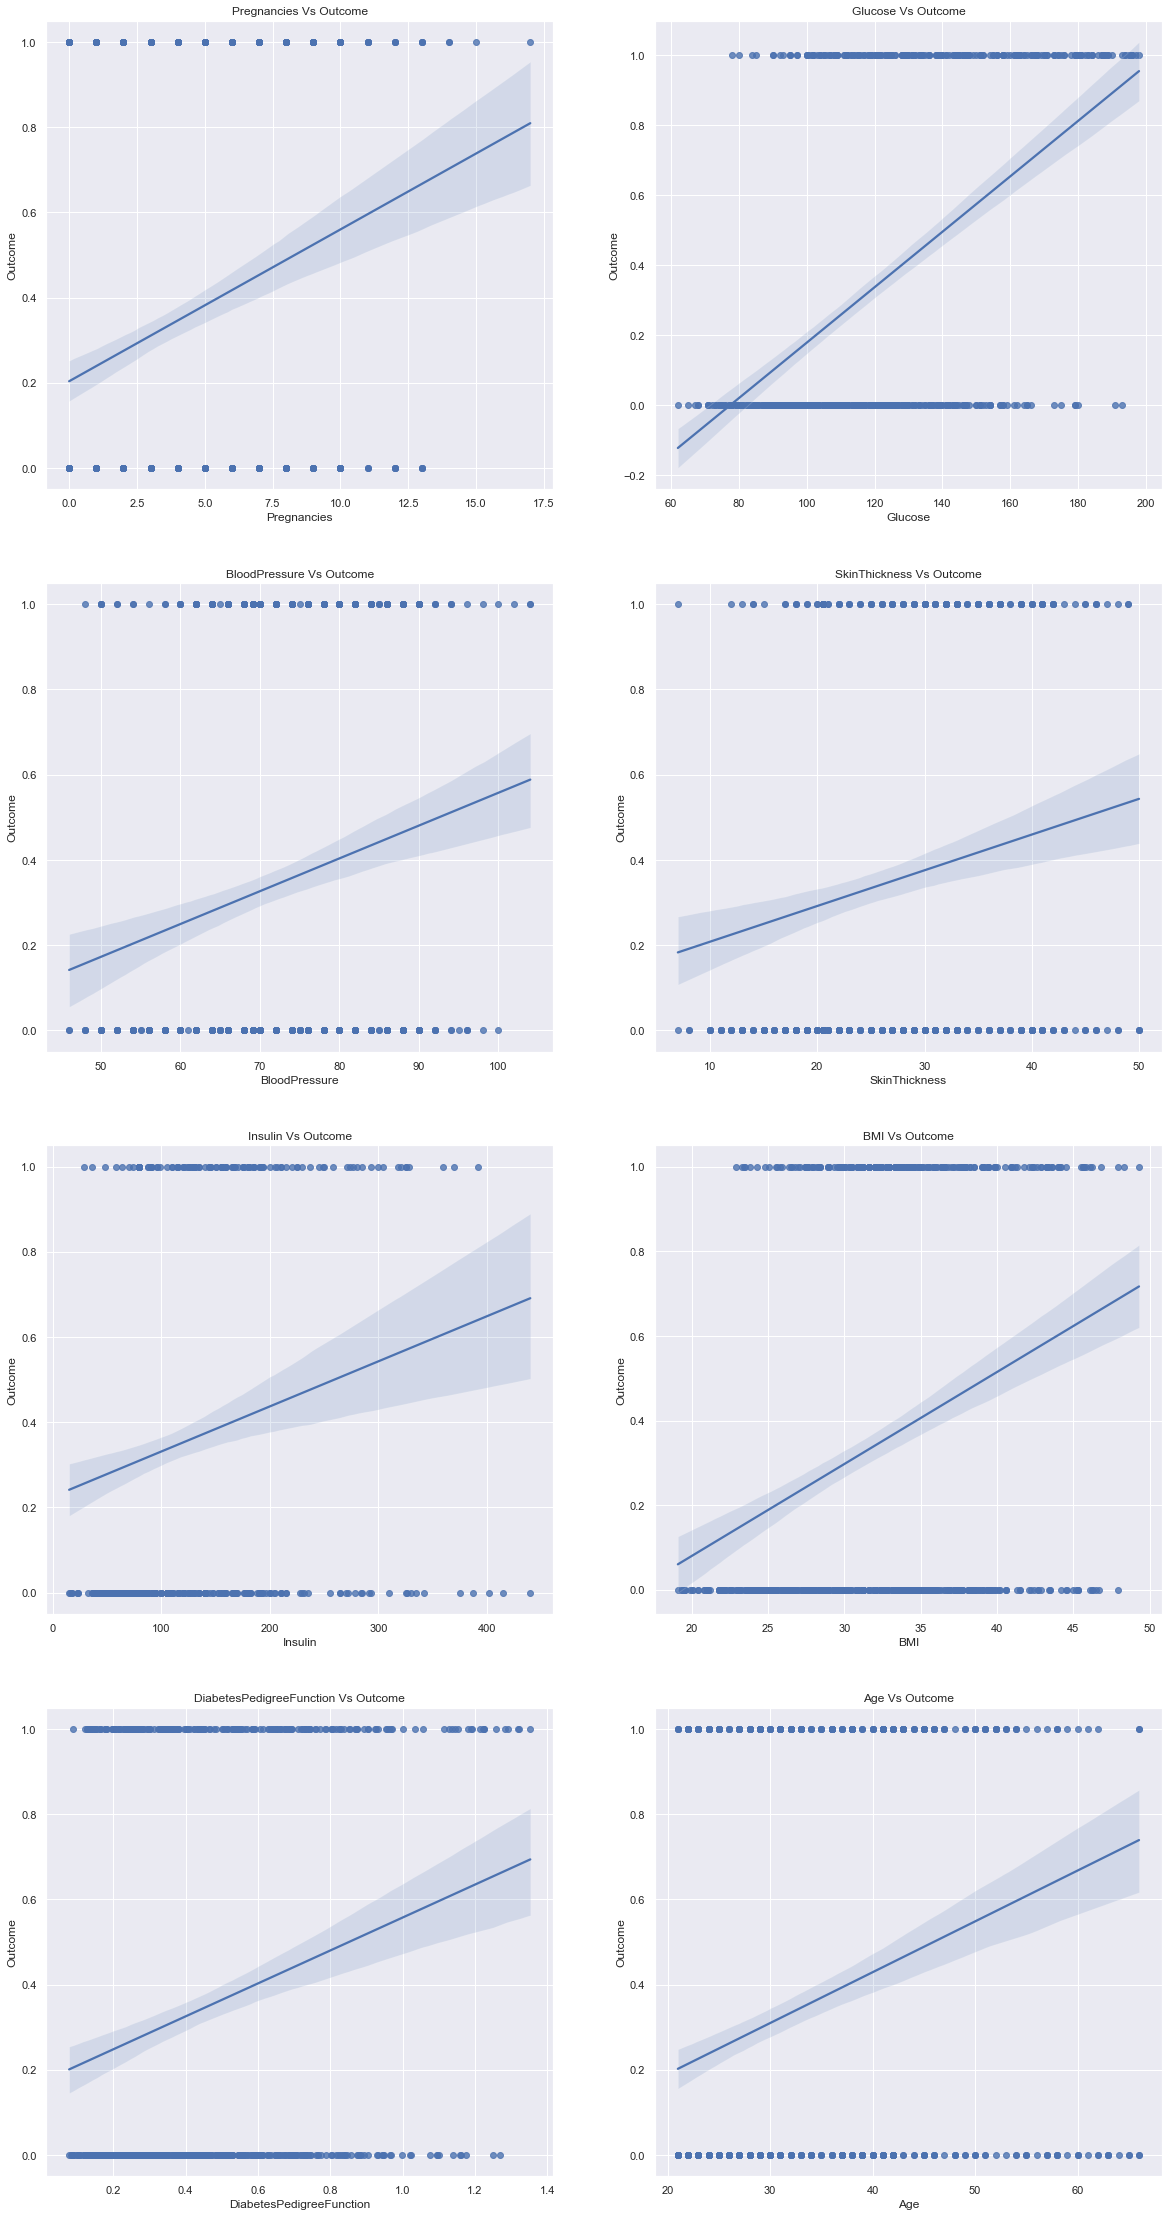

In [31]:
plt.figure(figsize=(20,50))
for i in enumerate(independent_features):
    plt.subplot(5, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(8,10)})
    sns.regplot(x=data[i[1]], y=data['Outcome'])
    plt.xlabel(i[1])
    plt.ylabel("Outcome")
    plt.title("{} Vs Outcome".format(i[1]))

### <span style='color:red '>2.10 Checking correlation between independent features and dependent feature</span>

In [32]:
corr=round(data[[feature for feature in data.columns]].corr(),2)
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.15,0.19,0.07,0.01,0.05,0.03,0.56,0.25
Glucose,0.15,1.00,0.21,0.10,0.38,0.19,0.09,0.30,0.49
BloodPressure,0.19,0.21,1.00,0.15,-0.00,0.27,0.05,0.35,0.17
SkinThickness,0.07,0.10,0.15,1.00,0.26,0.53,0.12,0.04,0.15
Insulin,0.01,0.38,-0.00,0.26,1.00,0.20,0.15,0.04,0.15
BMI,0.05,0.19,0.27,0.53,0.20,1.00,0.14,0.07,0.28
DiabetesPedigreeFunction,0.03,0.09,0.05,0.12,0.15,0.14,1.00,0.06,0.22
Age,0.56,0.30,0.35,0.04,0.04,0.07,0.06,1.00,0.28
Outcome,0.25,0.49,0.17,0.15,0.15,0.28,0.22,0.28,1.00


<AxesSubplot:>

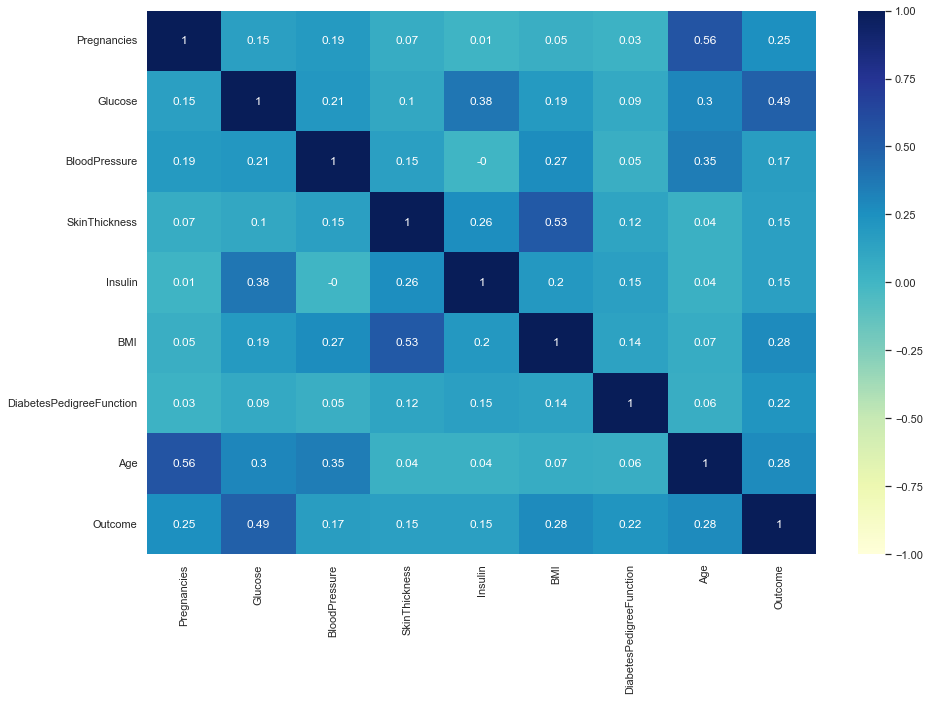

In [33]:
### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=corr, annot=True,cmap="YlGnBu", vmin=-1, vmax=1)

### <span style='color:#7B241C'>3.0  Model Building</span>

### <span style='color:#7B241C'>3.1 Getting independent features in dataset(X) and dependent feature in series(y)</span>

In [34]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0


In [35]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30


In [36]:
y.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

### <span style='color:red '>3.2 Splitting data into Training and Test data</span>

In [37]:
### random state train test split will be same with all people using random_state=16

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=16)

In [38]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
746,1,147.0,94.0,41.000000,79.799479,49.3,0.358,27
264,4,123.0,62.0,20.536458,79.799479,32.0,0.226,35
340,1,130.0,70.0,13.000000,105.000000,25.9,0.472,22
322,0,124.0,70.0,20.000000,79.799479,27.4,0.254,36
565,2,95.0,54.0,14.000000,88.000000,26.1,0.748,22


In [39]:
y_train.head()

746    1
264    1
340    0
322    1
565    0
Name: Outcome, dtype: int64

In [40]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
705,6,80.0,80.0,36.000000,79.799479,39.8,0.177,28
728,2,175.0,88.0,20.536458,79.799479,22.9,0.326,22
242,3,139.0,54.0,20.536458,79.799479,25.6,0.402,22
687,1,107.0,50.0,19.000000,79.799479,28.3,0.181,29
638,7,97.0,76.0,32.000000,91.000000,40.9,0.871,32


In [41]:
y_test.head()

705    0
728    0
242    1
687    0
638    1
Name: Outcome, dtype: int64

In [42]:
### both will have same shape
X_train.shape, y_train.shape

((584, 8), (584,))

In [43]:
### both will have same shape
X_test.shape, y_test.shape

((104, 8), (104,))

### <span style='color:red '>3.3 Standardisation/ feature scaling the dataset</span>

In [44]:
### Crating a standard scaler object
scaler=StandardScaler()
scaler

StandardScaler()

In [45]:
### using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.86019009,  0.94854966,  2.01983918, ...,  2.89360233,
        -0.31591105, -0.51401632],
       [ 0.04169683,  0.1172319 , -0.91556073, ...,  0.016956  ,
        -0.79724224,  0.20241693],
       [-0.86019009,  0.35969958, -0.18171075, ..., -0.99735282,
         0.09978406, -0.9617871 ],
       ...,
       [ 0.3423258 , -0.47161818,  0.91906421, ...,  1.26405701,
        -0.57845534,  0.47107939],
       [ 1.84547065, -0.64480938,  1.2859892 , ...,  2.27836583,
         2.52102579,  0.47107939],
       [ 1.54484168,  1.74522918,  0.18521424, ...,  2.01231762,
        -0.15182088,  0.91885017]])

In [46]:
### here using transform only to avoid data leakage
### (training mean and training std will be used for standardisation when we use transform)
X_test=scaler.transform(X_test)
X_test

array([[ 6.42954768e-01, -1.37221242e+00,  7.35601720e-01,
         1.18101174e+00, -4.38881751e-01,  1.31394105e+00,
        -9.75918211e-01, -4.24462162e-01],
       [-5.59561115e-01,  1.91842038e+00,  1.46945170e+00,
        -6.29808456e-01, -4.38881751e-01, -1.49619322e+00,
        -4.32597403e-01, -9.61787095e-01],
       [-2.58932144e-01,  6.71443739e-01, -1.64941070e+00,
        -6.29808456e-01, -4.38881751e-01, -1.04723686e+00,
        -1.55467326e-01, -9.61787095e-01],
       [-8.60190086e-01, -4.36979943e-01, -2.01633569e+00,
        -8.09731648e-01, -4.38881751e-01, -5.98280493e-01,
        -9.61332418e-01, -3.34908006e-01],
       [ 9.43583739e-01, -7.83362343e-01,  3.68676732e-01,
         7.12601531e-01, -2.66275971e-01,  1.49684920e+00,
         1.55471696e+00, -6.62455397e-02],
       [-1.16081906e+00, -6.44809383e-01, -7.32098232e-01,
        -1.04393675e+00, -4.38881751e-01, -1.81212547e+00,
        -7.02434583e-01, -1.05134125e+00],
       [ 1.24421271e+00,  1.087102

## <span style='color:red '>4.0 Model</span>
### <span style='color:red '>1.0 Logistic Regression</span>

In [47]:
### Creating a Logistic regression object
logistic_reg=LogisticRegression()
logistic_reg

LogisticRegression()

In [48]:
### Passing independant and dependant training data to the model
logistic_reg.fit(X_train,y_train)

LogisticRegression()

### <span style='color:red '>1.1 Using Above Model to get prediction for test data</span>

In [49]:
logistic_reg_pred=logistic_reg.predict(X_test)
logistic_reg_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

### <span style='color:red '>1.2.0 Performance Metrics</span>

### <span style='color:red '>1.2.1 Confusion Matrix</span>

In [50]:
confusion_mat=confusion_matrix(y_test, logistic_reg_pred)
confusion_mat

array([[56,  8],
       [16, 24]], dtype=int64)

In [51]:
truly_positive=confusion_mat[0][0]
falsely_positive=confusion_mat[0][1]
falsely_negative=confusion_mat[1][0]
truly_negative=confusion_mat[1][1]

### <span style='color:red '>1.2.2 Accuracy Score</span>

In [52]:
### accuracy using accuracy_score
accuracy=round(accuracy_score(y_test, logistic_reg_pred),4)
accuracy

0.7692

In [53]:
### manual calcualtion for accuracy
accuracy_manual=round(((truly_positive+truly_negative)/(truly_positive+falsely_positive+falsely_negative+truly_negative)),4)
print("Accuracy of our model is {}".format(accuracy_manual))

Accuracy of our model is 0.7692


### <span style='color:red '>1.2.3 Precision Score</span>

In [54]:
precision_manual_diabetic=round(truly_positive/(truly_positive+falsely_positive),4)
print("Precision of our model is {}".format(precision_manual_diabetic))

Precision of our model is 0.875


### <span style='color:red '>1.2.4 Recall Score</span>

In [55]:
recall_manual_diabetic=round(truly_positive/(truly_positive+falsely_negative),4)
print("Recall of our model is {}".format(recall_manual_diabetic))

Recall of our model is 0.7778


### <span style='color:red '>1.2.5 F-1 Score</span>

1. Giving equal importance to falsely positive and falsely negative

In [56]:
f1_score=2*(precision_manual_diabetic*recall_manual_diabetic)/(precision_manual_diabetic+recall_manual_diabetic)
print("F-1 Score of our model is {} ".format(round(f1_score,4)))

F-1 Score of our model is 0.8235 
